# Data Preprocessing

* I. Missing Value
* II.  Filtering
* III. 데이터프레임 합치기
* IV. 그룹 연산
* V. pivot_table( )
* VI. Multi-Index
* VII. etc

# I. Missing Value

> ## 1) 실습용 'titanic' 데이터셋

In [1]:
import seaborn as sns
TD = sns.load_dataset('titanic')

* 'titanic' Dataset Information

In [2]:
TD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


> ## 2) 결측치 확인

* 'age' 및 'deck' 열(Column)에서 <font color = 'red'>결측치(NaN)</font> 확인

In [3]:
TD.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


* .value_counts(<font color = 'red'>dropna = False</font>)
 - <font color = 'red'>결측치(NaN)를 포함</font>하여 빈도분석 결과 출력

In [4]:
TD['deck'].value_counts(dropna = False)

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

* .isnull( )
 - <font color = 'red'>결측치(NaN)</font>를 '<font color = 'red'>True</font>'로 출력

In [5]:
TD.head(10).isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
5,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


* 각 열(Column)별로 결측치(NaN) 개수 확인
* .isnull( ).<font color = 'blue'>sum(axis = 0)</font>
 - <font color = 'blue'>axis = 0: 행(Row)</font>
 - <font color = 'red'>axis = 1: 열(Column)</font>

In [6]:
TD.isnull().sum(axis = 0)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

* 각 행(Row)별로 결측치(NaN) 개수 확인
* .isnull( ).<font color = 'red'>sum(axis = 1)</font>

In [7]:
TD.isnull().sum(axis = 1).value_counts()

1    549
0    182
2    160
dtype: int64

* .notnull( )
 - <font color = 'red'>결측치(NaN)</font>를 '<font color = 'blue'>False</font>'로 출력

In [8]:
TD.head(10).notnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
5,True,True,True,False,True,True,True,True,True,True,True,False,True,True,True
6,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
8,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
9,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True


> ### (1) 격측치 막대 그래프

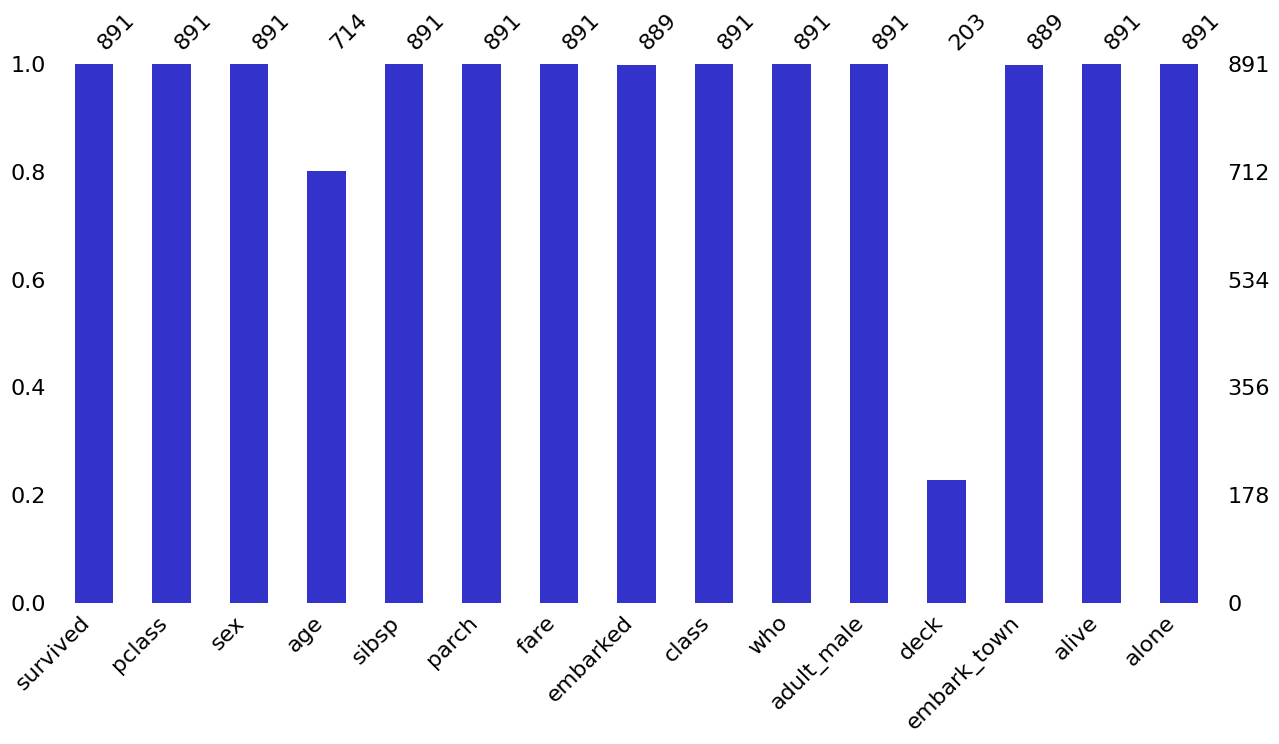

In [9]:
import missingno as msno

msno.bar(TD,
         figsize = (15, 7),
         color = (0.2, 0.2, 0.8));

> ### (2) 결측치 Matrix

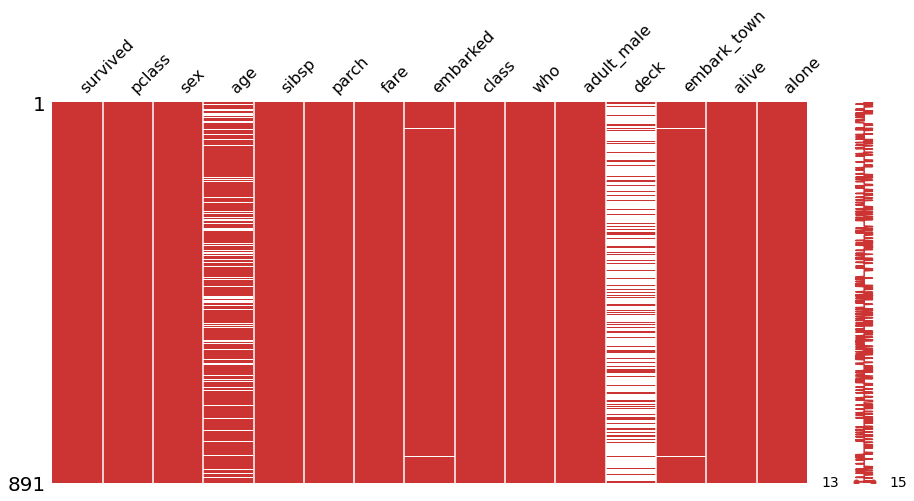

In [ ]:
msno.matrix(TD,
            figsize = (15, 7),
            color = (0.8, 0.2, 0.2));

> ## 3) 결측치 삭제

* 각 열(Column)별로 측정값(Non-NaN) 개수 확인

In [10]:
TD.notnull().sum(axis = 0)

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

* <font color = 'red'>300개 이하</font> 측정값(Non-Null)이 있는 <font color = 'red'>열(Column) 삭제</font>
 - .dropna(<font color = 'red'>thresh = 300</font>, axis = 1)
 - 'deck' 열 삭제

* 15 -> 14

In [11]:
TD.dropna(thresh = 300, axis = 1).shape

(891, 14)

* <font color = 'red'>'age'행(Column) 기준</font>으로 결측치가 있는 <font color = 'blue'>행(Row) 삭제</font>
 - .dropna(<font color = 'red'>subset = ['age']</font>, how = 'any', axis = 0)
 - how = 'all' : 모든 값이 결측치인 경우 삭제

In [12]:
TD.shape

(891, 15)

* 891 -> 714

In [13]:
TD.dropna(subset = ['age'], how = 'any', axis = 0).shape

(714, 15)

* 891 -> 182

In [ ]:
TD.dropna(subset = ['age', 'embarked', 'deck', 'embark_town'], how = 'any', axis = 0).shape

(182, 15)

> ## 4) 격측치 치환

* <font color = 'blue'>연속형 데이터</font> 치환
 - 'age'의 결측치를 <font color = 'red'>평균값</font>으로 치환
 - .fillna(int(DF['age'].<font color = 'red'>mean(axis = 0)</font>), inplace = True)

* 결측치(NaN) 확인

In [ ]:
TD['age'][4:7]

4    35.0
5     NaN
6    54.0
Name: age, dtype: float64

* 평균값으로 치환
 - 함수 적용 후 결과가 반영된 데이터프레임 반환: <font color = 'blue'>inplace = True

In [ ]:
TD['age'].fillna(int(TD['age'].mean(axis = 0)), inplace = True)

* NaN -> 29.0

In [ ]:
TD['age'][4:7]

4    35.0
5    29.0
6    54.0
Name: age, dtype: float64

* <font color = 'blue'>명목형 데이터</font> 치환
 - 'embark_town'의 결측치를 <font color = 'red'>최빈값</font>으로 치환
 - .fillna(most_freq, inplace = True)

* 결측치(NaN) 확인

In [ ]:
TD['embark_town'][828:831]

828    Queenstown
829           NaN
830     Cherbourg
Name: embark_town, dtype: object

* 최빈값 확인

In [ ]:
most_freq = TD['embark_town'].value_counts(dropna = True).idxmax()

most_freq

'Southampton'

* 최빈값으로 치환

In [ ]:
TD['embark_town'].fillna(most_freq, inplace = True)

* NaN -> Southampton

In [ ]:
TD['embark_town'][828:831]

828     Queenstown
829    Southampton
830      Cherbourg
Name: embark_town, dtype: object

* 결측치 치환 with 'ffill'
 - <font color = 'blue'>이전 데이터포인트로 치환</font>
 - .fillna(method = 'ffill', inplace = True)

In [ ]:
TD = sns.load_dataset('titanic')

TD['embark_town'][828:831]

828    Queenstown
829           NaN
830     Cherbourg
Name: embark_town, dtype: object

* <font color = 'blue'>method = 'ffill'

In [ ]:
TD['embark_town'].fillna(most_freq, inplace = True)

TD['embark_town'][828:831]

828    Queenstown
829    Queenstown
830     Cherbourg
Name: embark_town, dtype: object

* 결측치 치환 with 'bfill'
 - <font color = 'red'>다음 데이터포인트로 치환</font>
 - .fillna(method = 'bfill', inplace = True)

In [ ]:
TD = sns.load_dataset('titanic')

TD['embark_town'][828:831]

828    Queenstown
829           NaN
830     Cherbourg
Name: embark_town, dtype: object

* <font color = 'red'>method = 'bfill'

In [ ]:
TD['embark_town'].fillna(method = 'bfill', inplace = True)

TD['embark_town'][828:831]

828    Queenstown
829     Cherbourg
830     Cherbourg
Name: embark_town, dtype: object

# II. Filtering

> ## 1) 실습용 'titanic' 데이터셋

In [ ]:
import seaborn as sns
TD = sns.load_dataset('titanic')

TD.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


> ## 2) 'age'가 10살 이상이면서 20살 미만

* <font color = 'blue'>(TD.age >= 10) & (TD.age < 20)

In [ ]:
Filter_1 = (TD.age >= 10) & (TD.age < 20)

TD.loc[Filter_1, :].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
22,1,3,female,15.0,0,0,8.0292,Q,Third,child,False,NaN,Queenstown,yes,True
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
38,0,3,female,18.0,2,0,18.0000,S,Third,woman,False,NaN,Southampton,no,False


> ## 3) 'age'가 10살 미만이면서 'sex'이 여자

* <font color = 'blue'>(TD.age < 10) & (TD.sex == 'female')

In [ ]:
Filter_2 = (TD.age < 10) & (TD.sex == 'female')

TD.loc[Filter_2, :].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
24,0,3,female,8.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
43,1,2,female,3.0,1,2,41.5792,C,Second,child,False,NaN,Cherbourg,yes,False
58,1,2,female,5.0,1,2,27.7500,S,Second,child,False,NaN,Southampton,yes,False
119,0,3,female,2.0,4,2,31.2750,S,Third,child,False,NaN,Southampton,no,False


> ## 4) 'age'가 10살 미만 또는 60살 이상

* <font color = 'blue'>(TD.age < 10) | (TD.age >= 60)</font>
 - <font color = 'red'>'age', 'sex', 'alone' 열(Column)만</font> 출력

In [ ]:
Filter_3 = (TD.age < 10) | (TD.age >= 60)

TD.loc[Filter_3, ['age','sex','alone']].head()

,age,sex,alone
7,2.0,male,False
10,4.0,female,False
16,2.0,male,False
24,8.0,female,False
33,66.0,male,True


> ## 5) 'sibsp'에 3 또는 4 또는 5를 포함

* <font color = 'blue'>(TD.sibsp == 3) | (TD.sibsp == 4) | (TD.sibsp == 5)

In [ ]:
Filter_4 = (TD.sibsp == 3) | (TD.sibsp == 4) | (TD.sibsp == 5)

TD.loc[Filter_4, :].head(6)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
24,0,3,female,8.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
50,0,3,male,7.0,4,1,39.6875,S,Third,child,False,NaN,Southampton,no,False
59,0,3,male,11.0,5,2,46.9000,S,Third,child,False,NaN,Southampton,no,False


# III. 데이터프레임 합치기


> ## 1) 데이터프레임 TB1, TB2, TB3, TB4 생성

* TB1

In [ ]:
import pandas as pd

TB1 = pd.DataFrame({'Name': ['송태섭', '최유정', '이한나', '김소혜'],
                    'Gender': ['남자', '여자', '여자', '여자'],
                    'Age': ['21', '23', '20', '23']})


TB1

,Name,Gender,Age
0,송태섭,남자,21
1,최유정,여자,23
2,이한나,여자,20
3,김소혜,여자,23


* TB2

In [ ]:
TB2 = pd.DataFrame({'Name': ['송태섭', '최유정', '이한나', '김소혜'],
                    'Gender': ['남자', '여자', '여자', '여자'],
                    'Height': [179.1, 177.1, 167.9, 176.1],
                    'Weight': [63.9, 54.9, 50.2, 53.5]})

TB2

,Name,Gender,Height,Weight
0,송태섭,남자,179.1,63.9
1,최유정,여자,177.1,54.9
2,이한나,여자,167.9,50.2
3,김소혜,여자,176.1,53.5


* TB3

In [ ]:
TB3 = pd.DataFrame({'Name': ['서태웅', '정대만'],
                    'Gender': ['남자', '남자'],
                    'Age': ['24', '24']})


TB3

,Name,Gender,Age
0,서태웅,남자,24
1,정대만,남자,24


* TB4

In [ ]:
TB4 = pd.DataFrame({'Grade': [3, 1, 1, 3],
                    'Picture': ['무', '유', '무', '무']})


TB4

,Grade,Picture
0,3,무
1,1,유
2,1,무
3,3,무


> ## 2) .concat( )

* <font color = 'blue'>행기준: axis = 0
 - TB1 & TB2

In [ ]:
pd.concat([TB1, TB2], axis = 0)

,Name,Gender,Age,Height,Weight
0,송태섭,남자,21,NaN,NaN
1,최유정,여자,23,NaN,NaN
2,이한나,여자,20,NaN,NaN
3,김소혜,여자,23,NaN,NaN
0,송태섭,남자,NaN,179.1,63.9
1,최유정,여자,NaN,177.1,54.9
2,이한나,여자,NaN,167.9,50.2
3,김소혜,여자,NaN,176.1,53.5


* <font color = 'blue'>행기준: axis = 0
 - TB1 & TB3
* <font color = 'red'>ignore_index = True</font>
 - <font color = 'red'>Label 새로 구성

In [ ]:
pd.concat([TB1, TB3], axis = 0, ignore_index = True)

,Name,Gender,Age
0,송태섭,남자,21
1,최유정,여자,23
2,이한나,여자,20
3,김소혜,여자,23
4,서태웅,남자,24
5,정대만,남자,24


* <font color = 'blue'>열기준: axis = 1</font>
 - TB1 & TB2

In [ ]:
pd.concat([TB1, TB2], axis = 1)

,Name,Gender,Age,Name,Gender,Height,Weight
0,송태섭,남자,21,송태섭,남자,179.1,63.9
1,최유정,여자,23,최유정,여자,177.1,54.9
2,이한나,여자,20,이한나,여자,167.9,50.2
3,김소혜,여자,23,김소혜,여자,176.1,53.5


* <font color = 'blue'>열기준: axis = 1</font>
 - TB1 & TB4

In [ ]:
pd.concat([TB1, TB4], axis = 1)

,Name,Gender,Age,Grade,Picture
0,송태섭,남자,21,3,무
1,최유정,여자,23,1,유
2,이한나,여자,20,1,무
3,김소혜,여자,23,3,무


> ## 3) merge( )

* <font color = 'red'>on = ['Name', 'Gender']
 - TB1 & TB2

In [ ]:
pd.merge(TB1, TB2, on = ['Name', 'Gender'])

,Name,Gender,Age,Height,Weight
0,송태섭,남자,21,179.1,63.9
1,최유정,여자,23,177.1,54.9
2,이한나,여자,20,167.9,50.2
3,김소혜,여자,23,176.1,53.5


# IV. 그룹 연산

> ## 1) 실습용 'titanic' 데이터셋

In [ ]:
import seaborn as sns
titanic = sns.load_dataset('titanic')

TD = titanic.loc[:, ['age', 'sex', 'class', 'fare', 'survived']]

TD.head()

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0


> ## 2) groupby( ) - 'class' 기준

* 'class' 기준의 <font color = 'blue'>DataFrameGroupBy 객체</font> 생성

In [ ]:
grouped = TD.groupby(['class'])

grouped

* 'First' 키 그룹 정보 확인
 - .get_group('First')

In [ ]:
grouped.get_group('First').head(3)

,age,sex,class,fare,survived
1,38.0,female,First,71.2833,1
3,35.0,female,First,53.1000,1
6,54.0,male,First,51.8625,0


* groupby 결과 확인(3개 그룹)
 - 'First', 'Second', 'Third' 키별 3줄씩 출력
 - .get_group('Key_Name')

In [ ]:
for key in ['First', 'Second', 'Third']:
  print(grouped.get_group(key).head(3))
  print('\n')

    age     sex  class     fare  survived
1  38.0  female  First  71.2833         1
3  35.0  female  First  53.1000         1
6  54.0    male  First  51.8625         0


     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
17   NaN    male  Second  13.0000         1


    age     sex  class   fare  survived
0  22.0    male  Third  7.250         0
2  26.0  female  Third  7.925         1
4  35.0    male  Third  8.050         0




* 3개 그룹별 평균('age', 'fare', 'survived')

In [ ]:
grouped.mean()

,age,fare,survived
class,,,
First,38.233441,84.154687,0.629630
Second,29.877630,20.662183,0.472826
Third,25.140620,13.675550,0.242363


> ## 3) groupby( ) - 'class' & 'sex' 기준


* <font color = 'blue'>두 개 키(Key) 사용</font>하여 DataFrameGoupBy 객체 생성
 - 'class', 'sex' 키 적용

In [ ]:
grouped_TWO = TD.groupby(['class', 'sex'])

grouped_TWO

* ('First', 'female') 키 그룹 정보 확인
 - .get_group(('First', 'female'))

In [ ]:
grouped_TWO.get_group(('First', 'female')).head(3)

,age,sex,class,fare,survived
1,38.0,female,First,71.2833,1
3,35.0,female,First,53.1000,1
11,58.0,female,First,26.5500,1


* groupby 결과 확인(<font color = 'blue'>6개 그룹</font>)

In [ ]:
for key, group in grouped_TWO:
  print('* key :', key)
  print('* number :', len(group))
  print(group.head(3))
  print('\n')

* key : ('First', 'female')
* number : 94
     age     sex  class     fare  survived
1   38.0  female  First  71.2833         1
3   35.0  female  First  53.1000         1
11  58.0  female  First  26.5500         1


* key : ('First', 'male')
* number : 122
     age   sex  class      fare  survived
6   54.0  male  First   51.8625         0
23  28.0  male  First   35.5000         1
27  19.0  male  First  263.0000         0


* key : ('Second', 'female')
* number : 76
     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
41  27.0  female  Second  21.0000         0


* key : ('Second', 'male')
* number : 108
     age   sex   class  fare  survived
17   NaN  male  Second  13.0         1
20  35.0  male  Second  26.0         0
21  34.0  male  Second  13.0         1


* key : ('Third', 'female')
* number : 144
     age     sex  class     fare  survived
2   26.0  female  Third   7.9250         1
8   27.0  female  Third

* 6개 그룹별 평균('age', 'fare', 'survived')

In [ ]:
grouped_TWO.mean()

age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447

> ## 4) agg( )

* Aggregation : <font color = 'blue'>여러개의 함수</font>를 groupby 객체에 적용
 - 그룹별로 연산 결과를 집계하여 반환

* grouped

In [ ]:
grouped.agg(['mean', 'std'])

age                  fare             survived          
             mean        std       mean        std      mean       std
class                                                                 
First   38.233441  14.802856  84.154687  78.380373  0.629630  0.484026
Second  29.877630  14.001077  20.662183  13.417399  0.472826  0.500623
Third   25.140620  12.495398  13.675550  11.778142  0.242363  0.428949

* grouped_TWO

In [ ]:
grouped_TWO.agg(['mean', 'std'])

age                   fare             survived          
                    mean        std        mean        std      mean       std
class  sex                                                                    
First  female  34.611765  13.612052  106.125798  74.259988  0.968085  0.176716
       male    41.281386  15.139570   67.226127  77.548021  0.368852  0.484484
Second female  28.722973  12.872702   21.970121  10.891796  0.921053  0.271448
       male    30.740707  14.793894   19.741782  14.922235  0.157407  0.365882
Third  female  21.750000  12.729964   16.118810  11.690314  0.500000  0.501745
       male    26.507589  12.159514   12.661633  11.681696  0.135447  0.342694

* <font color = 'blue'>fare 열에만</font> 적용

In [ ]:
grouped.fare.agg(['min', 'max'])

,min,max
class,,
First,0.0,512.3292
Second,0.0,73.5000
Third,0.0,69.5500


* fare 및 age 열에 <font color = 'red'>각각 다른 함수</font> 적용

In [ ]:
grouped.agg({'fare' : ['min', 'max'], 'age' : ['mean', 'std']})

fare                  age           
        min       max       mean        std
class                                      
First   0.0  512.3292  38.233441  14.802856
Second  0.0   73.5000  29.877630  14.001077
Third   0.0   69.5500  25.140620  12.495398

> ## 5) filter( )

* 데이터 개수가 200개 이상인 그룹의 결과만 필터링
 - 'First', 'Third'

In [ ]:
grouped.filter(lambda x : len(x) >= 200).head()

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0


* 그룹별 데이터 개수 확인

In [ ]:
grouped.apply(len)

class
First     216
Second    184
Third     491
dtype: int64

* 'age' 열 평균이 30보다 작은 그룹의 결과만 필터링
 - 'Second', 'Third'

In [ ]:
grouped.filter(lambda x: x.age.mean() < 30).tail()

,age,sex,class,fare,survived
884,25.0,male,Third,7.050,0
885,39.0,female,Third,29.125,0
886,27.0,male,Second,13.000,0
888,NaN,female,Third,23.450,0
890,32.0,male,Third,7.750,0


* 그룹별 'age' 열의 평균

In [ ]:
grouped.age.mean()

class
First     38.233441
Second    29.877630
Third     25.140620
Name: age, dtype: float64

# V.  pivot_table( )

> ## 1) 실습용 'titanic' 데이터셋

In [ ]:
import seaborn as sns
titanic = sns.load_dataset('titanic')

TD = titanic.loc[:, ['age', 'sex', 'class', 'fare', 'survived']]

TD.head(3)

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1


> ## 2) pivot_table( ) 구성요소

* index : 행 인덱스
* column : 열 인덱스
* values : 데이터
* aggfunc : 적용 함수

In [ ]:
TD_1 = pd.pivot_table(TD,
                     index = 'class',
                     columns = 'sex',
                     values = 'age',
                     aggfunc = 'mean')

TD_1

sex,female,male
class,,
First,34.611765,41.281386
Second,28.722973,30.740707
Third,21.750000,26.507589


> ## 3) 두개의 적용 함수

In [ ]:
TD_2 = pd.pivot_table(TD,
                     index = 'class',
                     columns = 'sex',
                     values = 'survived',
                     aggfunc = ['mean', 'sum'])

TD_2

mean              sum     
sex       female      male female male
class                                 
First   0.968085  0.368852     91   45
Second  0.921053  0.157407     70   17
Third   0.500000  0.135447     72   47

> ## 4) 다중 인덱스, 다중 데이터, 다중 함수

In [ ]:
TD_3 = pd.pivot_table(TD,
                     index = ['class', 'sex'],
                     columns = 'survived',
                     values = ['age','fare'],
                     aggfunc = {'age' : ['mean', 'std'], 'fare' : ['min', 'max']})

TD_3

age                                     fare            \
                    mean                   std                max             
survived               0          1          0          1       0         1   
class  sex                                                                    
First  female  25.666667  34.939024  24.006943  13.223014  151.55  512.3292   
       male    44.581967  36.248000  14.457749  14.936744  263.00  512.3292   
Second female  36.000000  28.080882  12.915107  12.764693   26.00   65.0000   
       male    33.369048  16.022000  12.158125  19.547122   73.50   39.0000   
Third  female  23.818182  19.329787  12.833465  12.303246   69.55   31.3875   
       male    27.255814  22.274211  12.135707  11.555786   69.55   56.4958   

                                 
                   min           
survived             0        1  
class  sex                       
First  female  28.7125  25.9292  
       male     0.0000  26.2875  
Second female  10.5000  10.5000  
       male     0.0000  10.5000  
Third  female   6.7500   7.2250  
       male     0.0000   0.0000

# VI. Multi-Index

* <font color = 'red'>.xs( )</font>: Cross Section



> ## 1) <font color = 'blue'>행 멀티인덱스</font>

* names = ['class', 'sex']

In [ ]:
TD_3.index

MultiIndex([( 'First', 'female'),
            ( 'First',   'male'),
            ('Second', 'female'),
            ('Second',   'male'),
            ( 'Third', 'female'),
            ( 'Third',   'male')],
           names=['class', 'sex'])

* <font color = 'blue'>행 멀티인덱스</font>: 객실 등급이 일등실
 - level = 'class'

In [ ]:
TD_3.xs('First', level = 'class', axis = 0)

age                                     fare            \
               mean                   std                max             
survived          0          1          0          1       0         1   
sex                                                                      
female    25.666667  34.939024  24.006943  13.223014  151.55  512.3292   
male      44.581967  36.248000  14.457749  14.936744  263.00  512.3292   

                            
              min           
survived        0        1  
sex                         
female    28.7125  25.9292  
male       0.0000  26.2875

* <font color = 'blue'>행 멀티인덱스</font>: 성별이 남자
 - level = 'sex'

In [ ]:
TD_3.xs('male', level = 'sex', axis = 0)

age                                     fare                 \
               mean                   std                max            min   
survived          0          1          0          1       0         1    0   
class                                                                         
First     44.581967  36.248000  14.457749  14.936744  263.00  512.3292  0.0   
Second    33.369048  16.022000  12.158125  19.547122   73.50   39.0000  0.0   
Third     27.255814  22.274211  12.135707  11.555786   69.55   56.4958  0.0   

                   
                   
survived        1  
class              
First     26.2875  
Second    10.5000  
Third      0.0000

* <font color = 'blue'>행 멀티인덱스</font>: 객실등급이 일등실이면서 성별이 남자
 - level = ['class', 'sex']

In [ ]:
TD_3.xs(('First', 'male'), level = ['class', 'sex'], axis = 0)

age                                 fare                 \
                 mean                std               max            min   
survived            0       1          0          1      0         1    0   
class sex                                                                   
First male  44.581967  36.248  14.457749  14.936744  263.0  512.3292  0.0   

                     
                     
survived          1  
class sex            
First male  26.2875

> ## 2) <font color = 'red'>열 멀티인덱스</font>

 - names = [None, None, 'survived']
 - names = [0, 1, 2]

In [ ]:
TD_3.columns

MultiIndex([( 'age', 'mean', 0),
            ( 'age', 'mean', 1),
            ( 'age',  'std', 0),
            ( 'age',  'std', 1),
            ('fare',  'max', 0),
            ('fare',  'max', 1),
            ('fare',  'min', 0),
            ('fare',  'min', 1)],
           names=[None, None, 'survived'])

* <font color = 'blue'>.set_names( )
 - names: ['Header', 'Fuction', 'Survived']

In [ ]:
TD_3.columns.set_names(['Header', 'Fuction', 'Survived'], inplace = True)

In [ ]:
TD_3.columns

MultiIndex([( 'age', 'mean', 0),
            ( 'age', 'mean', 1),
            ( 'age',  'std', 0),
            ( 'age',  'std', 1),
            ('fare',  'max', 0),
            ('fare',  'max', 1),
            ('fare',  'min', 0),
            ('fare',  'min', 1)],
           names=['Header', 'Fuction', 'Survived'])

* <font color = 'blue'>.set_levels( )
 - Level(Survived): ['Dead', 'Alive']

In [ ]:
TD_3.columns.set_levels(['Dead', 'Alive'], level = 2, inplace = True)

<ipython-input-69-ace6f01fc354>:1: FutureWarning: inplace is deprecated and will be removed in a future version.
  TD_3.columns.set_levels(['Dead', 'Alive'], level = 2, inplace = True)


In [ ]:
TD_3.columns

MultiIndex([( 'age', 'mean',  'Dead'),
            ( 'age', 'mean', 'Alive'),
            ( 'age',  'std',  'Dead'),
            ( 'age',  'std', 'Alive'),
            ('fare',  'max',  'Dead'),
            ('fare',  'max', 'Alive'),
            ('fare',  'min',  'Dead'),
            ('fare',  'min', 'Alive')],
           names=['Header', 'Fuction', 'Survived'])

In [ ]:
TD_3

Header               age                                     fare            \
Fuction             mean                   std                max             
Survived            Dead      Alive       Dead      Alive    Dead     Alive   
class  sex                                                                    
First  female  25.666667  34.939024  24.006943  13.223014  151.55  512.3292   
       male    44.581967  36.248000  14.457749  14.936744  263.00  512.3292   
Second female  36.000000  28.080882  12.915107  12.764693   26.00   65.0000   
       male    33.369048  16.022000  12.158125  19.547122   73.50   39.0000   
Third  female  23.818182  19.329787  12.833465  12.303246   69.55   31.3875   
       male    27.255814  22.274211  12.135707  11.555786   69.55   56.4958   

Header                           
Fuction            min           
Survived          Dead    Alive  
class  sex                       
First  female  28.7125  25.9292  
       male     0.0000  26.2875  
Second female  10.5000  10.5000  
       male     0.0000  10.5000  
Third  female   6.7500   7.2250  
       male     0.0000   0.0000

* <font color = 'red'>열 멀티인덱스</font>: 평균 나이

In [ ]:
TD_3.xs('mean', level = 'Fuction', axis = 1)

Header               age           
Survived            Dead      Alive
class  sex                         
First  female  25.666667  34.939024
       male    44.581967  36.248000
Second female  36.000000  28.080882
       male    33.369048  16.022000
Third  female  23.818182  19.329787
       male    27.255814  22.274211

* <font color = 'red'>열 멀티인덱스</font>: 생존자 정보

In [ ]:
TD_3.xs('Alive', level = 'Survived', axis = 1)

Header               age                 fare         
Fuction             mean        std       max      min
class  sex                                            
First  female  34.939024  13.223014  512.3292  25.9292
       male    36.248000  14.936744  512.3292  26.2875
Second female  28.080882  12.764693   65.0000  10.5000
       male    16.022000  19.547122   39.0000  10.5000
Third  female  19.329787  12.303246   31.3875   7.2250
       male    22.274211  11.555786   56.4958   0.0000

* <font color = 'red'>열 멀티인덱스</font>: 최저 요금

In [ ]:
TD_3.xs(('fare', 'min'), level = ['Header', 'Fuction'], axis = 1)

Survived          Dead    Alive
class  sex                     
First  female  28.7125  25.9292
       male     0.0000  26.2875
Second female  10.5000  10.5000
       male     0.0000  10.5000
Third  female   6.7500   7.2250
       male     0.0000   0.0000

* <font color = 'red'>열 멀티인덱스</font>: 사망자의 평균 나이

In [ ]:
TD_3.xs(('age', 'mean', 'Dead'), level = ['Header', 'Fuction', 'Survived'], axis = 1)

Header               age
Fuction             mean
Survived            Dead
class  sex              
First  female  25.666667
       male    44.581967
Second female  36.000000
       male    33.369048
Third  female  23.818182
       male    27.255814

# VII. etc

> ## 1) 실습용 'titanic' 데이터셋

In [ ]:
import seaborn as sns
titanic = sns.load_dataset('titanic')

TD = titanic.loc[:, ['age', 'sex', 'class', 'fare', 'survived']]

TD.head()

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0


> ## 2) .value_counts( )

* <font color = 'blue'>Series

In [ ]:
TD['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

* <font color = 'red'>DataFrame

In [ ]:
TD[['sex', 'class']].value_counts()

sex     class 
male    Third     347
female  Third     144
male    First     122
        Second    108
female  First      94
        Second     76
dtype: int64

> ## 3) .nunique( )

* <font color = 'blue'>Series

In [ ]:
TD['sex'].nunique()

2

* <font color = 'red'>DataFrame

In [ ]:
TD[['sex', 'class']].nunique()

sex      2
class    3
dtype: int64

> ## 4) .replace( )

* <font color = 'blue'>Series

In [ ]:
TD.loc[[0, 4], :]

,age,sex,class,fare,survived
0,22.0,male,Third,7.25,0
4,35.0,male,Third,8.05,0


In [ ]:
TD['sex'] = TD['sex'].replace('male', 'MAN')

In [ ]:
TD.loc[TD['sex'] == 'MAN', :][:2]

,age,sex,class,fare,survived
0,22.0,MAN,Third,7.25,0
4,35.0,MAN,Third,8.05,0


* <font color = 'red'>DataFrame

In [ ]:
TD.loc[[1, 9, 0], :]

,age,sex,class,fare,survived
1,38.0,female,First,71.2833,1
9,14.0,female,Second,30.0708,1
0,22.0,MAN,Third,7.2500,0


In [ ]:
TD[['class']] = TD[['class']].replace({'First':'1st', 'Second':'2nd', 'Third':'3rd'})

In [ ]:
TD.loc[[1, 9, 0], :]

,age,sex,class,fare,survived
1,38.0,female,1st,71.2833,1
9,14.0,female,2nd,30.0708,1
0,22.0,MAN,3rd,7.2500,0


* <font color = 'green'>Missing Value

In [ ]:
TD.loc[[5], :]

,age,sex,class,fare,survived
5,NaN,MAN,3rd,8.4583,0


In [ ]:
import numpy as np

TD[['age']] = TD[['age']].replace(np.nan, int(TD.age.mean()))

In [ ]:
TD.loc[[5], :]

,age,sex,class,fare,survived
5,29.0,MAN,3rd,8.4583,0


#
#
#
# The End
#
#
#